# National Parks Service

Data analysis on the conservation statuses of these species and explore if there are any patterns or themes to the types of species that become endangered. 

### *observations.csv:* contains data about different species and their conservation status
* `category` - class of animal
* `scientific_name` - the scientific name of each species
* `common_name` - the common names of each species
* `conservation_status` - each species’ current conservation status

### *species_info.csv:* holds recorded sightings of different species at several national parks for the past 7 days.
* `scientific_name` - the scientific name of each species
* `park_name` - Park where species were found
* `observations` - the number of times each species was observed at park

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_obs = pd.read_csv("observations.csv")
df_spe = pd.read_csv("species_info.csv")

## Data analysis

In [3]:
df_obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
df_spe.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
df_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [6]:
df_spe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [7]:
drop_spe = df_spe.dropna().copy()

In [8]:
drop_spe.conservation_status.unique()

array(['Species of Concern', 'Endangered', 'Threatened', 'In Recovery'],
      dtype=object)

Under the [Endangered Species Act (ESA)](https://www.fisheries.noaa.gov/national/endangered-species-conservation/endangered-species-act), plant and animal species may be listed as either *endangered* or *threatened*. *“Endangered”* means a species is in danger of extinction throughout all or a significant portion of its range. *“Threatened”* means a species is likely to become endangered within the foreseeable future.'

In [9]:
sns.set_style("whitegrid")

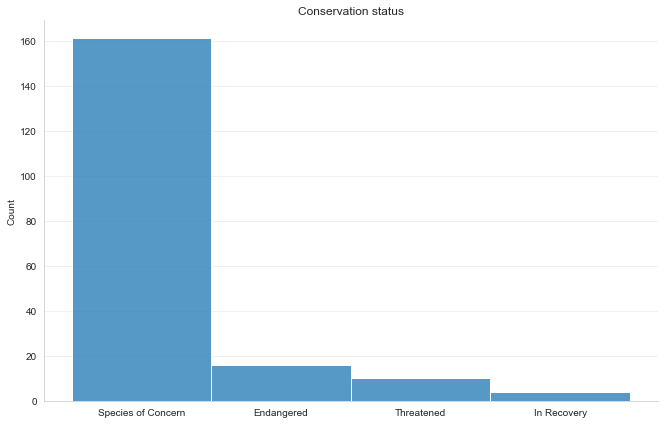

In [10]:
plt.figure(figsize=(11,7))
sns.histplot(data=drop_spe, x="conservation_status")
sns.despine(left=False, bottom=False)
plt.grid(color="#EEEEEE")
plt.grid(False, axis="x")
plt.title("Conservation status")
plt.xlabel("")
plt.show()

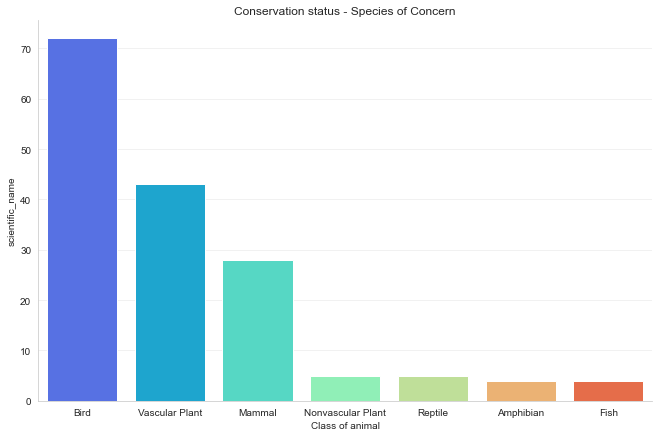

In [64]:
data = drop_spe[drop_spe.conservation_status == "Species of Concern"]
data = data.groupby("category")\
            .count()\
            .sort_values("scientific_name", ascending=False)

plt.figure(figsize=(11,7))
sns.barplot(data=data, x=data.index, y="scientific_name", palette="rainbow")
sns.despine(left=False, bottom=False)
plt.grid(color="#EEEEEE")
plt.grid(False, axis="x")
plt.title("Conservation status - Species of Concern")
plt.xlabel("Class of animal")
plt.show()

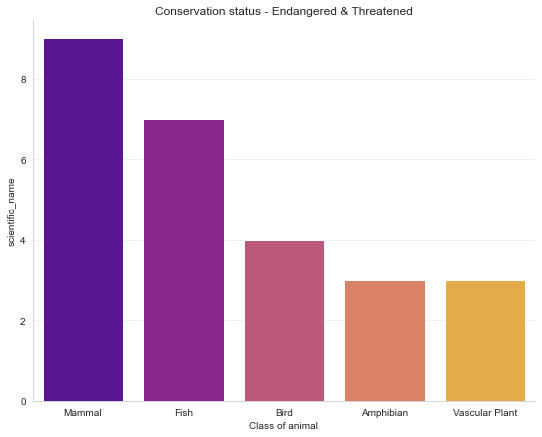

In [68]:
data = drop_spe[(drop_spe.conservation_status == "Endangered") |
                (drop_spe.conservation_status == "Threatened")]

data = data.groupby("category")\
            .count()\
            .sort_values("scientific_name", ascending=False)

plt.figure(figsize=(9,7))
sns.barplot(data=data, x=data.index, y="scientific_name", palette="plasma")
sns.despine(left=False, bottom=False)
plt.grid(color="#EEEEEE")
plt.grid(False, axis="x")
plt.title("Conservation status - Endangered & Threatened")
plt.xlabel("Class of animal")
plt.show()